# Introduction

In this lab, we will explore how to perform joint feature selection using the multi-task Lasso algorithm. We will use scikit-learn, a popular Python machine learning library, to generate some sample data and fit models to it. We will then plot the results of the models to see how they compare.

# Generate Data

First, we need to generate some sample data that we can use to fit our models. We will use numpy to generate 100 samples, each with 30 features and 40 tasks. We will also randomly select 5 relevant features and create coefficients for them using sine waves with random frequency and phase. Finally, we will add some random noise to the data.

In [1]:
import numpy as np

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

# Fit Models

Now that we have our data, we can fit models to it using the Lasso and multi-task Lasso algorithms. We will fit a Lasso model for each task and then fit a multi-task Lasso model to all tasks at once.

In [2]:
from sklearn.linear_model import MultiTaskLasso, Lasso

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_

# Plot Results

Finally, we can plot the results of our models to see how they compare. We will plot the support (i.e., the location of non-zero coefficients) for each model, as well as the time series for one of the features.

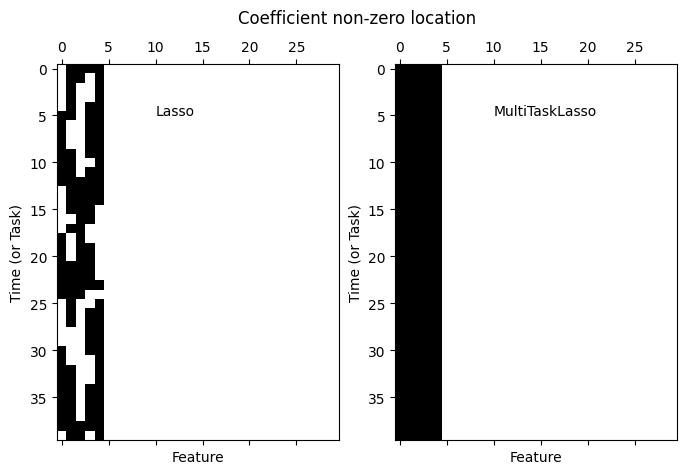

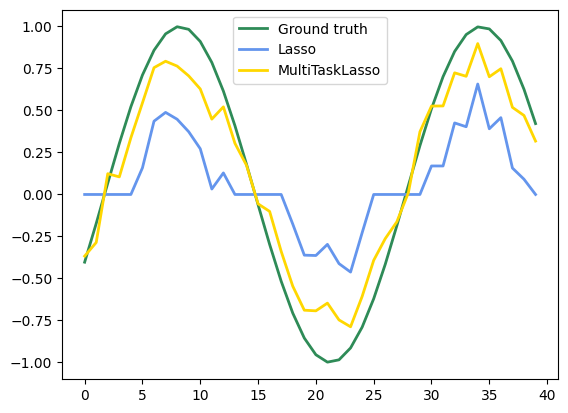

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()

# Summary

In this lab, we learned how to perform joint feature selection using the multi-task Lasso algorithm. We generated some sample data, fit models to it using Lasso and multi-task Lasso, and plotted the results. We can see that the multi-task Lasso algorithm is better able to select relevant features across all tasks compared to the Lasso algorithm.